In [1]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import preprocessing 
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
data=pd.read_csv("ISLAB-main\Lab5_penguins.csv")
data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
new_data = data.dropna(axis=0, inplace=False)
new_data.head()

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,6,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007


In [4]:
le=preprocessing.LabelEncoder()
species_encoded=le.fit_transform(new_data['species'])
feature=list(zip(new_data['bill_length_mm'],new_data['bill_depth_mm'],new_data['flipper_length_mm'],new_data['body_mass_g']))
label=species_encoded
train = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

In [5]:
def func(algorithm,labels):

    plt.figure(figsize=(18, 7))
    for metric_index, metric in enumerate(['Accuracy', 'Precision', 'Recall'], 1):
        plt.subplot(1, 3, metric_index)

        for j,clf in enumerate(algorithm):
            metric_array = []

            for i in train:
                x_train, x_test, y_train, y_test = train_test_split(feature, label, test_size=i, random_state=42)
                clf.fit(x_train, y_train)
                y_pred = clf.predict(x_test)

                if metric == 'Accuracy':
                    metric_array.append(accuracy_score(y_test, y_pred))
                elif metric == 'Precision':
                    metric_array.append(precision_score(y_test, y_pred, average='micro'))
                elif metric == 'Recall':
                    metric_array.append(recall_score(y_test, y_pred, average='micro'))
            plt.plot(train, metric_array, marker="^",label=labels[j])  # Extracting classifier name
        plt.title(f"{metric} Score")
        plt.xlabel("Testing Size")
        plt.ylabel("Score")
        plt.legend()


    plt.show()

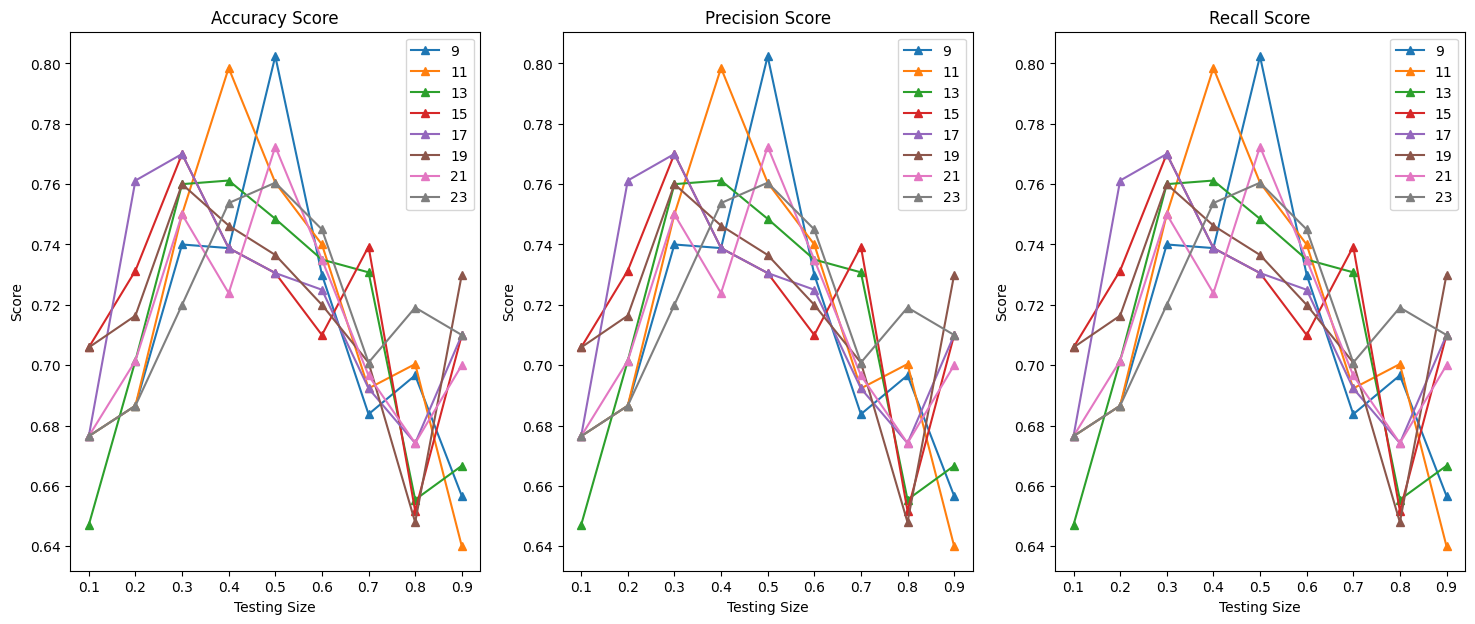

In [6]:
neighbors_list = [9, 11, 13, 15, 17, 19, 21, 23]
algorithm = [KNeighborsClassifier(n_neighbors=n) for n in neighbors_list]
func(algorithm,neighbors_list)

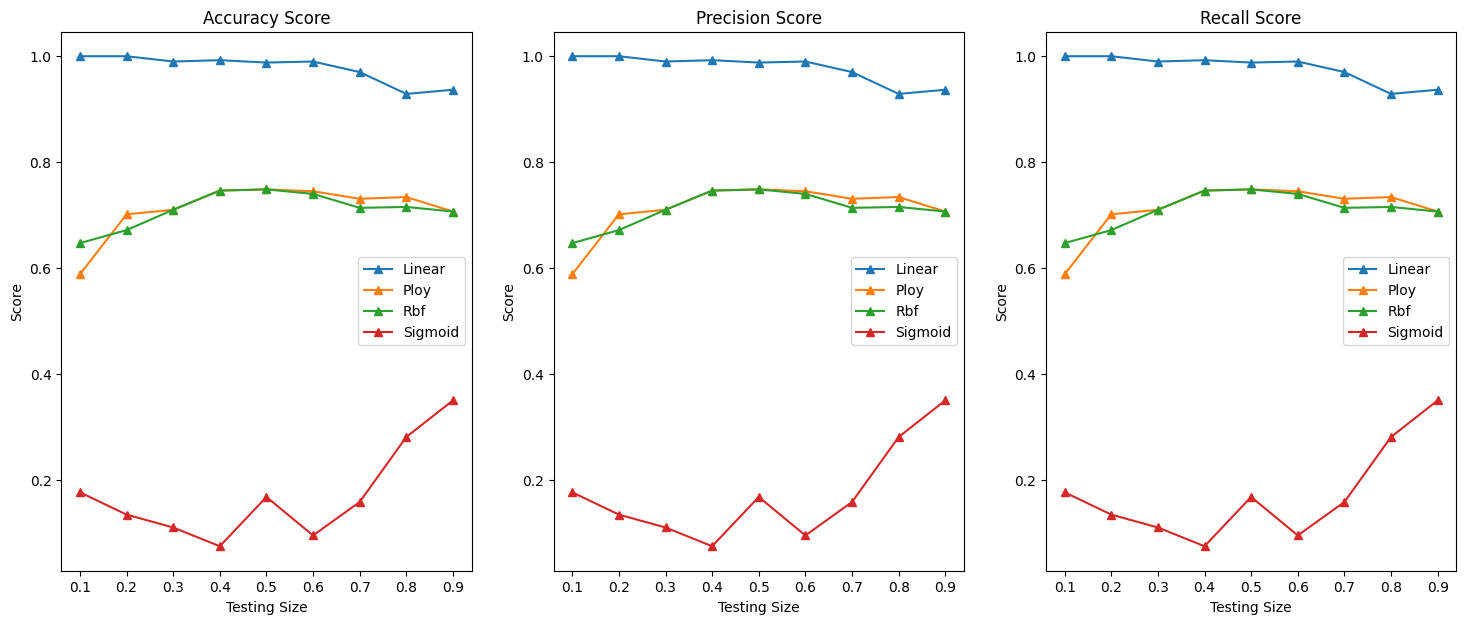

In [17]:
algorithm = [svm.SVC(kernel='linear'),svm.SVC(kernel='poly'),svm.SVC(kernel='rbf'),svm.SVC(kernel='sigmoid')]
labels=['Linear','Ploy','Rbf','Sigmoid']
func(algorithm,labels)


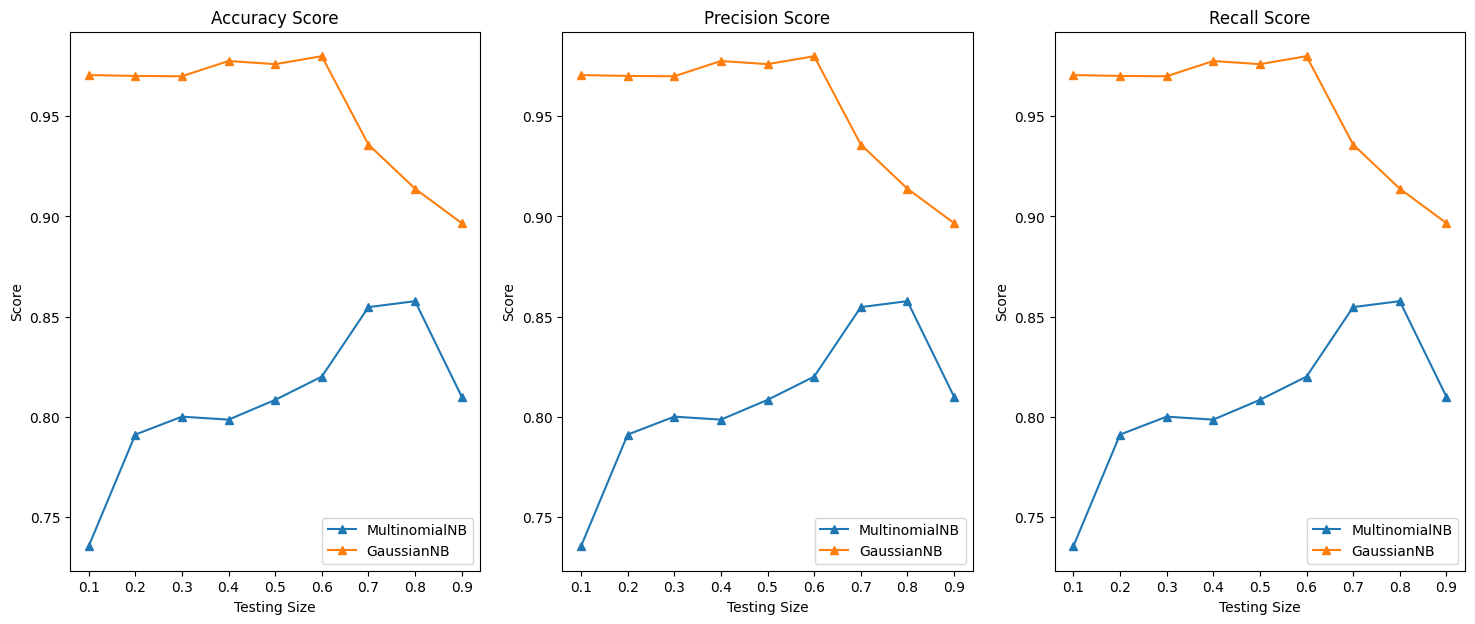

In [8]:
algorithm = [MultinomialNB(),GaussianNB()]
labels=['MultinomialNB','GaussianNB']
func(algorithm,labels)

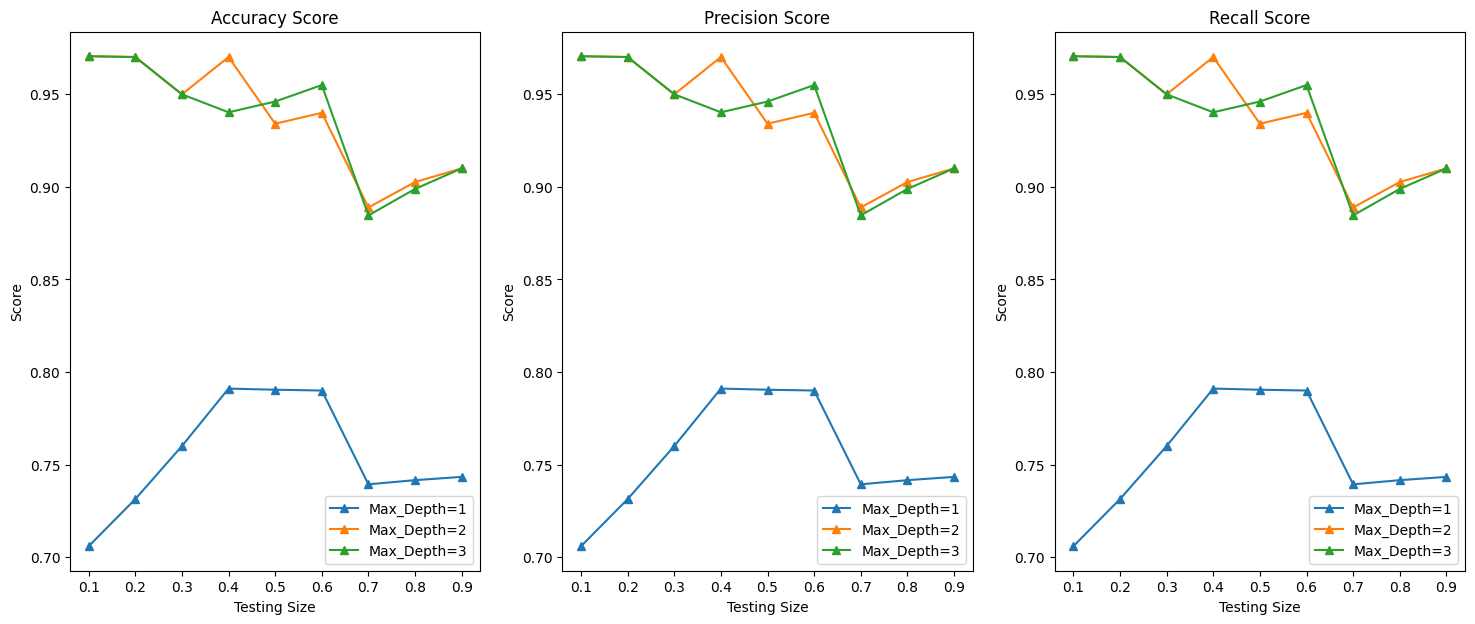

In [20]:
algorithm = [DecisionTreeClassifier(max_depth=1),DecisionTreeClassifier(max_depth=2),DecisionTreeClassifier(max_depth=3)]
labels=['Max_Depth=1','Max_Depth=2','Max_Depth=3']
func(algorithm,labels)

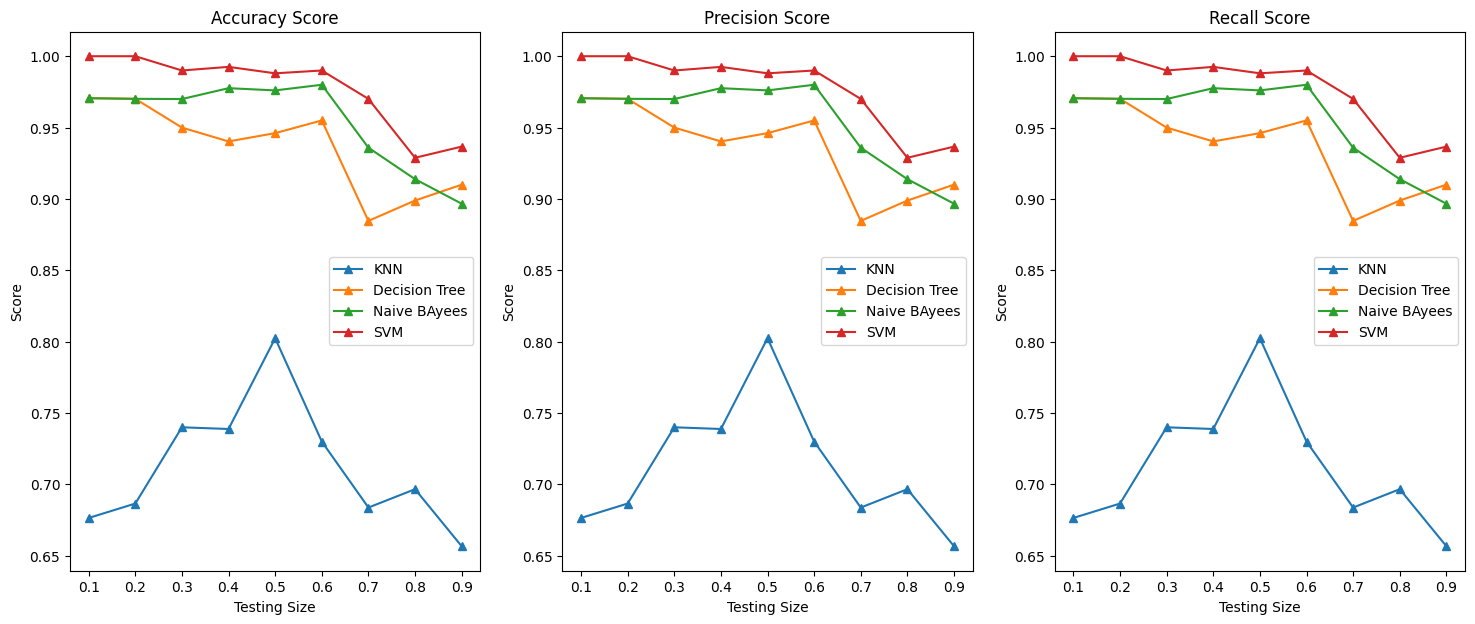

In [30]:
algorithm = [KNeighborsClassifier(n_neighbors=9), DecisionTreeClassifier(max_depth=3),GaussianNB(),svm.SVC(kernel='linear')]
labels=['KNN','Decision Tree','Naive BAyees','SVM']
func(algorithm,labels)